In [1]:
import numpy as np

with open('C:\\Users\\yangz\\Desktop\\FireProjectBatchDownloadNew\\Perimeter\\24_Osgood_146.npy', 'rb') as f:
    savedStack = np.load(f)
    

In [2]:
combinedIndex = savedStack[0]+savedStack[1]+savedStack[2]
combinedIndex = np.divide(combinedIndex, 3)
combinedIndex[combinedIndex>660] = 660
combinedIndex[combinedIndex<-660] = -660
combinedIndexMin = np.min(combinedIndex)
combinedIndexMax = np.max(combinedIndex)
combinedIndex = (combinedIndex-combinedIndexMin)/(combinedIndexMax-combinedIndexMin)


In [3]:
NDWI = savedStack[7]
NDWI[NDWI>2] = 2
NDWI[NDWI<-2] = -2
NDWIMin = np.min(NDWI)
NDWIMax = np.max(NDWI)
NDWI = (NDWI-NDWIMin)/(NDWIMax-NDWIMin)
NDWI = NDWI


In [4]:
result = combinedIndex - NDWI
result[result<0] = 0
resultMin = np.min(result)
resultMax = np.max(result)
result = (result-resultMin)/(resultMax-resultMin)
result = result*660


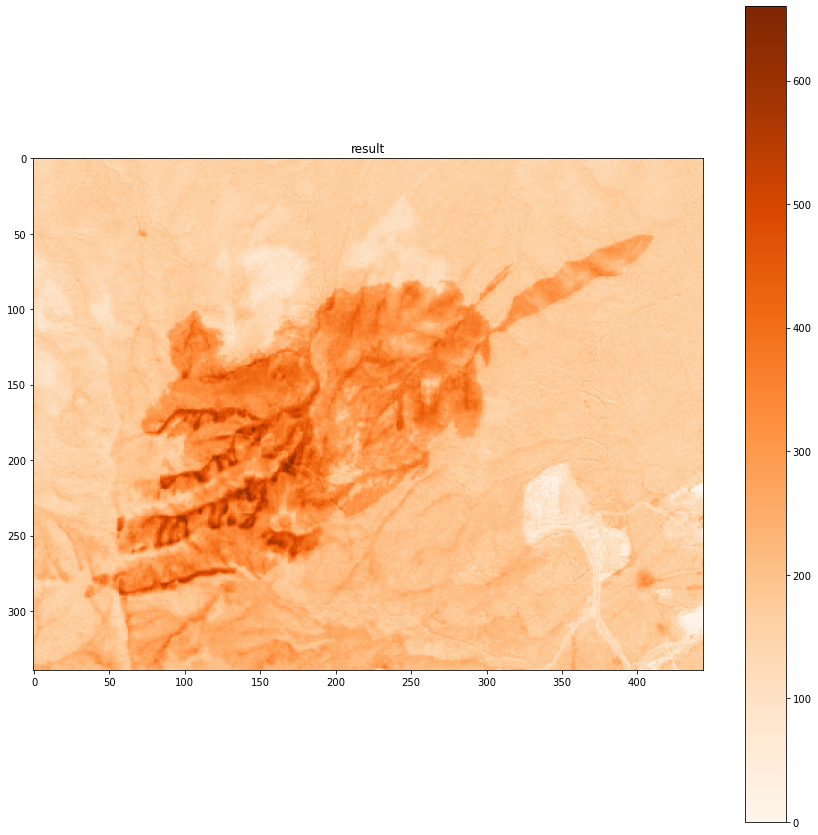

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
plt.imshow(result, cmap="Oranges")
#plt.clim(-500, 650)
#plt.clim(-1500, 1950)
plt.title("result")
plt.colorbar()
plt.show()


In [6]:
result[result<250] = 0
result[result>250] = 660

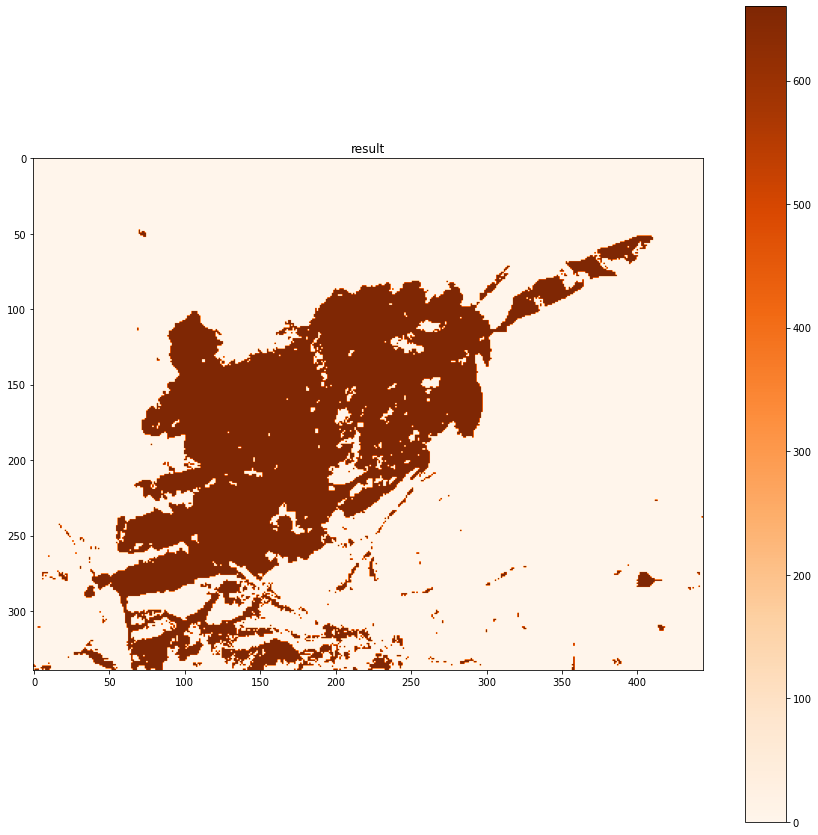

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
plt.imshow(result, cmap="Oranges")
#plt.clim(-500, 650)
#plt.clim(-1500, 1950)
plt.title("result")
plt.colorbar()
plt.show()

In [8]:
combinedIndex2 = savedStack[6]
combinedIndex2 = np.divide(combinedIndex2, 2)
combinedIndex2[combinedIndex2>=100] = 660
combinedIndex2[combinedIndex2<100] = 0


In [9]:
NDWI2 = savedStack[7]
NDWI2[NDWI2>2] = 2
NDWI2[NDWI2<-2] = -2
NDWI2Min = np.min(NDWI2)
NDWI2Max = np.max(NDWI2)
NDWI2 = (NDWI2-NDWI2Min)/(NDWI2Max-NDWI2Min)
NDWI2[NDWI2>=0.45] = 660
NDWI2[NDWI2<0.45] = 0


In [10]:
result2 = combinedIndex2 - NDWI2
result2[result2<0] = 0


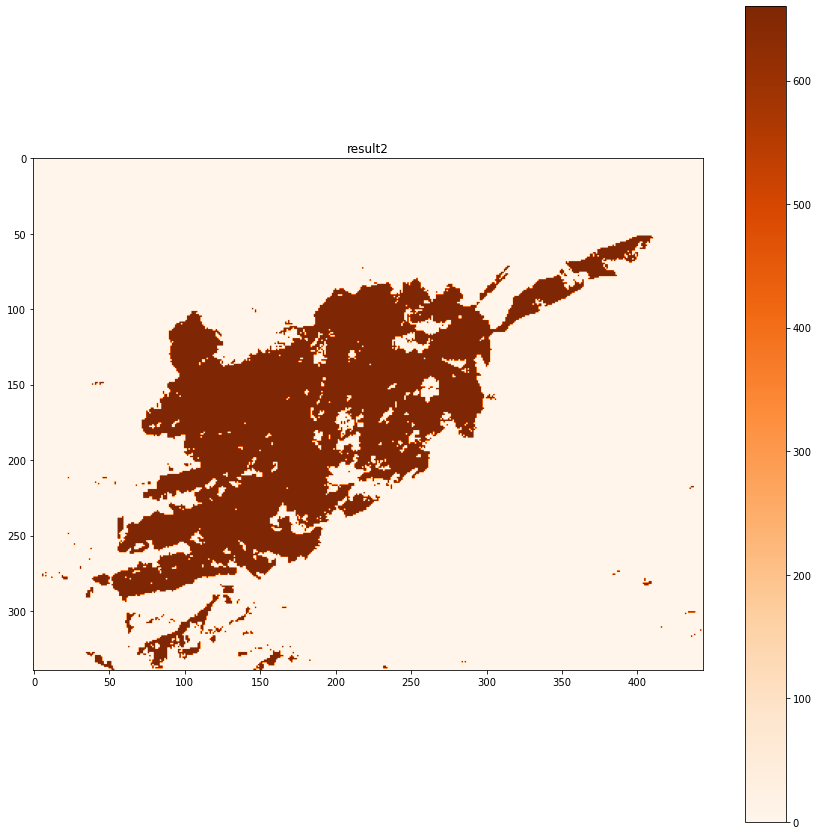

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
plt.imshow(result2, cmap="Oranges")
#plt.clim(-500, 650)
#plt.clim(-1500, 1950)
plt.title("result2")
plt.colorbar()
plt.show()


In [12]:
result3 = result+result2
result3[result3<900] = 0
result3[result3>900] = 200


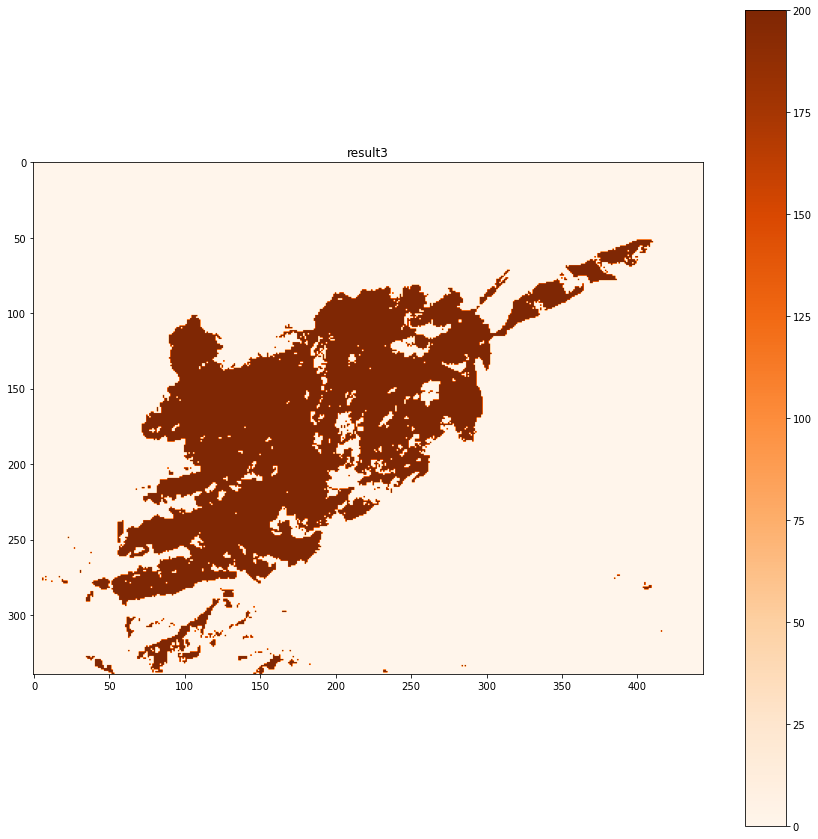

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
plt.imshow(result3, cmap="Oranges")
#plt.clim(-500, 650)
#plt.clim(-1500, 1950)
plt.title("result3")
plt.colorbar()
plt.show()

In [14]:
print (result3.shape)
result4 = result3.reshape((1, 340, 444))
print (result4.shape)

(340, 444)
(1, 340, 444)


In [15]:
result4 = np.concatenate((result4, result4, result4))

In [16]:
print(result4.shape)

(3, 340, 444)


In [17]:
import matplotlib.pyplot as plt
import numpy as np


def plot_image(image, factor=1.0, clip_range = None, **kwargs):
    """
    Utility function for plotting RGB images.
    """
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
    if clip_range is not None:
        pos = ax.imshow(np.clip(image * factor, *clip_range), **kwargs)
        fig.colorbar(pos, ax=ax)
        
    else:
        ax.imshow(image * factor, **kwargs)
    ax.set_xticks([])
    ax.set_yticks([])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


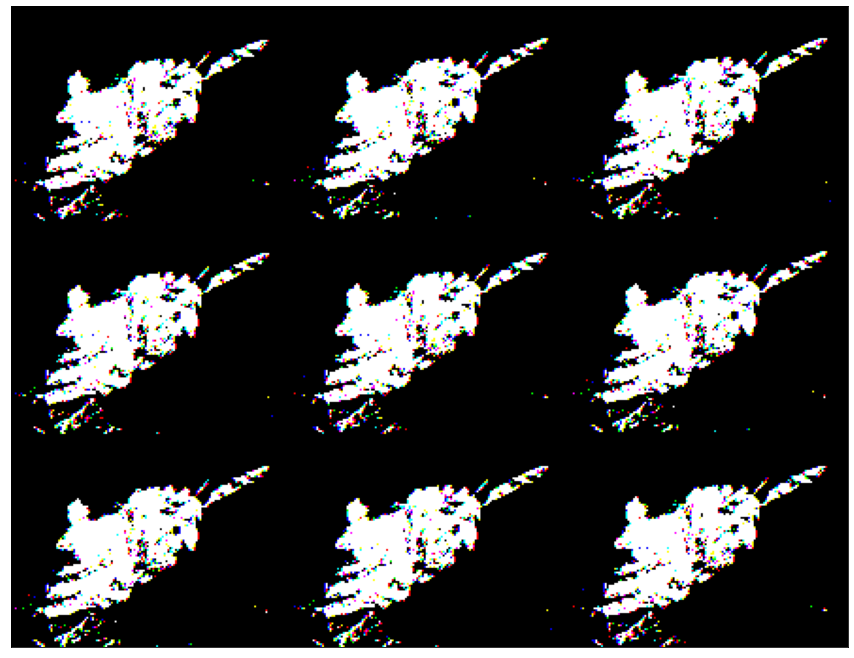

In [18]:
result5 = result4.reshape(340, 444, 3)
plot_image(result5)

In [30]:
result3 = result3.astype("uint8")
print (result3.shape)
resultSP = result3.reshape((340, 444, 1))
print (resultSP.shape)

(340, 444)
(340, 444, 1)


In [35]:
img = result3
stacked_img = np.stack((result3, )*3, axis=-1)
#print(stacked_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


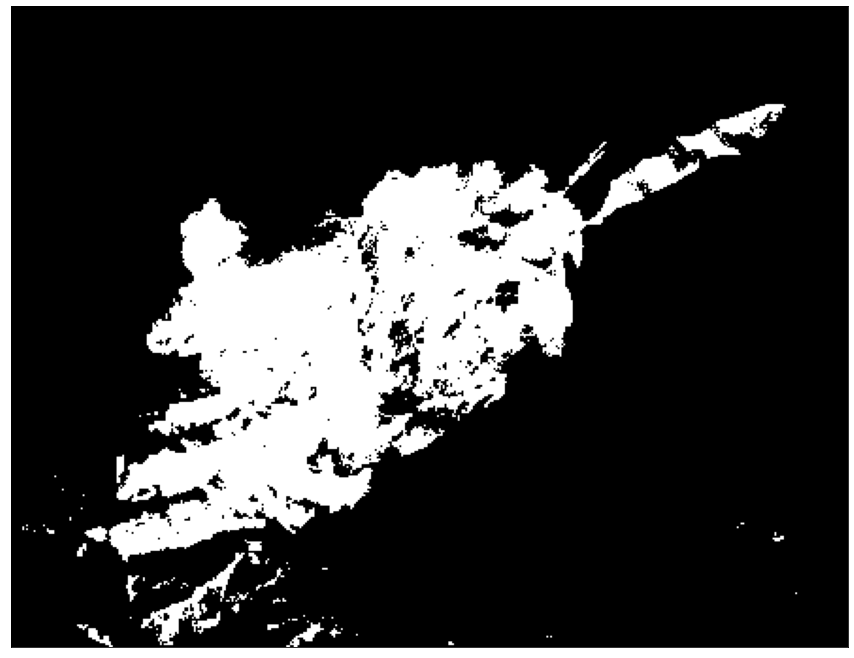

In [36]:
plot_image(stacked_img)

In [29]:
stacked_img.shape

(340, 444, 3)

In [113]:
#stacked_img = stacked_img.reshape((3, 340, 444))

In [115]:
from PIL import Image
im = Image.fromarray(stacked_img)
im.save("testSave.png")